<a href="https://colab.research.google.com/github/vKrish14/Loan-Risk-Prediction-Using-Transaction-Information/blob/main/Loan_Risk_Prediction_Using_Transaction_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5754 - loss: 0.6909 - val_accuracy: 0.8321 - val_loss: 0.4724
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8167 - loss: 0.5007 - val_accuracy: 0.8321 - val_loss: 0.4491
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8254 - loss: 0.4646 - val_accuracy: 0.8321 - val_loss: 0.4393
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8174 - loss: 0.4608 - val_accuracy: 0.8326 - val_loss: 0.4352
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8228 - loss: 0.4487 - val_accuracy: 0.8321 - val_loss: 0.4319
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8238 - loss: 0.4437 - val_accuracy: 0.8326 - val_loss: 0.4311
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8242 - loss: 0.4326 - val_accuracy: 0.8321 - val_loss: 0.4299
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8224 - loss: 0.4415 - val_accuracy: 0.8326 - val_loss

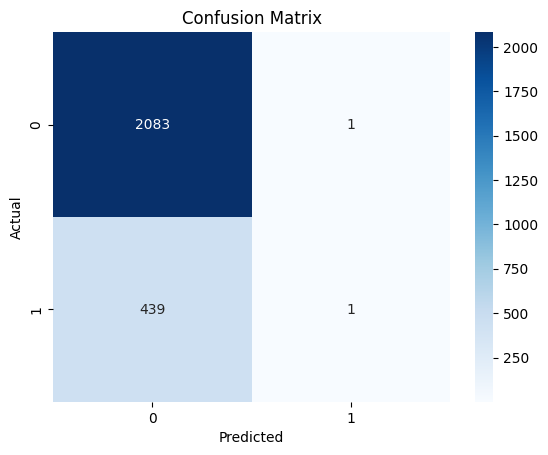

Logistic Regression Accuracy: 0.8260697305863708
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      2084
           1       0.54      0.02      0.03       440

    accuracy                           0.83      2524
   macro avg       0.68      0.51      0.47      2524
weighted avg       0.78      0.83      0.75      2524



In [2]:
# Install required libraries (if not already available in Colab)
!pip install tensorflow keras scikit-learn pandas numpy matplotlib seaborn

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# If running in Colab, upload the files manually if not already present
import os
if not os.path.exists('accepted_2007_to_2018Q4.csv') or not os.path.exists('rejected_2007_to_2018Q4.csv'):
    from google.colab import files
    uploaded = files.upload()

# Use only the accepted loans file for supervised learning (it has the 'loan_status' column)
csv_file = 'accepted_2007_to_2018Q4.csv'

# Load dataset (this file is very large; consider using nrows=100000 for a sample)
df = pd.read_csv(csv_file, low_memory=False, nrows=100000)

# Select relevant columns (adjust based on actual dataset)
columns_to_use = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
    'home_ownership', 'annual_inc', 'purpose', 'dti', 'delinq_2yrs',
    'revol_util', 'total_acc', 'loan_status'
]
df = df[columns_to_use]

# Remove rows with missing target or features
df = df.dropna(subset=['loan_status'])

# Convert target to binary: 1 = Default/Charged Off, 0 = Fully Paid
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)

# Handle categorical variables
cat_cols = ['term', 'grade', 'emp_length', 'home_ownership', 'purpose']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Fill missing numerical values with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# Split features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Build and Train the Feedforward Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)

# Evaluate the Model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compare with Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_lr_pred))
print(classification_report(y_test, y_lr_pred))

# Save the trained model (optional)
model.save('credit_risk_model.h5')
